In this problem set, you will use regression analysis to model the climate of different areas and try to find evidence of global warming. You will create models to analyze and visualize climate change in terms of temperature. 

In [ ]:
CITIES = [
    'BOSTON',
    'SEATTLE',
    'SAN DIEGO',
    'PHILADELPHIA',
    'PHOENIX',
    'LAS VEGAS',
    'CHARLOTTE',
    'DALLAS',
    'BALTIMORE',
    'SAN JUAN',
    'LOS ANGELES',
    'MIAMI',
    'NEW ORLEANS',
    'ALBUQUERQUE',
    'PORTLAND',
    'SAN FRANCISCO',
    'TAMPA',
    'NEW YORK',
    'DETROIT',
    'ST LOUIS',
    'CHICAGO'
]

INTERVAL_1 = list(range(1961, 2006))
INTERVAL_2 = list(range(2006, 2016))


class Climate(object):
    """
    The collection of temperature records loaded from given csv file
    """
    def __init__(self, filename):
        """
        Initialize a Climate instance, which stores the temperature records
        loaded from a given csv file specified by filename.

        Args:
            filename: name of the csv file (str)
        """
        self.rawdata = {}
        f = open(filename, 'r')
        header = f.readline().strip().split(',')
        for line in f:
            items = line.strip().split(',')

            date = re.match('(\d\d\d\d)(\d\d)(\d\d)', items[header.index('DATE')])
            year = int(date.group(1))
            month = int(date.group(2))
            day = int(date.group(3))

            city = items[header.index('CITY')]
            temperature = float(items[header.index('TEMP')])
            if city not in self.rawdata:
                self.rawdata[city] = {}
            if year not in self.rawdata[city]:
                self.rawdata[city][year] = {}
            if month not in self.rawdata[city][year]:
                self.rawdata[city][year][month] = {}
            self.rawdata[city][year][month][day] = temperature 
        f.close()

        
    def get_yearly_temp(self, city, year):
        """
        Get the daily temperatures for the given year and city.

        Args:
            city: city name (str)
            year: the year to get the data for (int)

        Returns:
            a numpy 1-d array of daily temperatures for the specified year and
            city
        """
        temperatures = []
        assert city in self.rawdata, "provided city is not available"
        assert year in self.rawdata[city], "provided year is not available"
        for month in range(1, 13):
            for day in range(1, 32):
                if day in self.rawdata[city][year][month]:
                    temperatures.append(self.rawdata[city][year][month][day])
        return np.array(temperatures)

    
    def get_daily_temp(self, city, month, day, year):
        """
        Get the daily temperature for the given city and time (year + date).

        Args:
            city: city name (str)
            month: the month to get the data for (int, where January = 1,
                December = 12)
            day: the day to get the data for (int, where 1st day of month = 1)
            year: the year to get the data for (int)

        Returns:
            a float of the daily temperature for the specified time (year +
            date) and city
        """
        assert city in self.rawdata, "provided city is not available"
        assert year in self.rawdata[city], "provided year is not available"
        assert month in self.rawdata[city][year], "provided month is not available"
        assert day in self.rawdata[city][year][month], "provided day is not available"
        return self.rawdata[city][year][month][day]

In [ ]:
def generate_models(x, y, degs):
    """
    Generate regression models by fitting a polynomial for each degree in degs
    to points (x, y).
    Args:
        x: a list with length N, representing the x-coords of N sample points
        y: a list with length N, representing the y-coords of N sample points
        degs: a list of degrees of the fitting polynomial
    Returns:
        a list of numpy arrays, where each array is a 1-d array of coefficients
        that minimizes the squared error of the fitting polynomial
    """
    list_model = []
    for deg in degs:
        model = np.polyfit(x, y, deg)
        list_model.append(model)
    return list_model

def r_squared(y, estimated):
    """
    Calculate the R-squared error term.
    Args:
        y: list with length N, representing the y-coords of N sample points
        estimated: a list of values estimated by the regression model
    Returns:
        a float for the R-squared error term
    """
    mean = sum(y)/float(len(y))
    numer = 0
    denom = 0
    for i in range(len(y)):
        numer = numer + (y[i] - estimated[i])**2
        denom = denom + (y[i] - mean)**2
    return 1 - numer/denom

def evaluate_models_on_training(x, y, models):
    """
    For each regression model, compute the R-square for this model with the
    standard error over slope of a linear regression line (only if the model is
    linear), and plot the data along with the best fit curve.

    For the plots, you should plot data points (x,y) as blue dots and your best
    fit curve (aka model) as a red solid line. You should also label the axes
    of this figure appropriately and have a title reporting the following
    information:
        degree of your regression model,
        R-square of your model evaluated on the given data points
    Args:
        x: a list of length N, representing the x-coords of N sample points
        y: a list of length N, representing the y-coords of N sample points
        models: a list containing the regression models you want to apply to
            your data. Each model is a numpy array storing the coefficients of
            a polynomial.
    Returns:
        None
    """
    import numpy as np
    list_esval = []
    list_r = []
    for model in models:
        esVals = np.polyval(model, x)
        list_esval.append(esVals)
        list_r.append(r_squared(y, esVals))
    pylab.plot(x, y, 'bo', label = 'Measured points')
    pylab.title("average temperature per year")
    pylab.xlabel("Year")
    pylab.ylabel("average temperature")
    for model in range(len(models)):
        pylab.plot(x, list_esval[model], label = 'Linear fit, deg = '+
                   str(len(models[model])-1)+', R2 = '+str(round(list_r[model],4)), color = 'red')
    pylab.legend(loc = 'best')
    pylab.show()

In [2]:
import pylab, random

def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    discardHeader = dataFile.readline()
    for line in dataFile:
        d, m = line.split()
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)

def plotData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81 # convert mass to force (F = mg)
    pylab.plot(xVals, yVals, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('Force (Newtons)')
    pylab.ylabel('Distance (meters)')

##plotData('springData.txt')
##pylab.show()

def testErrors(ntrials=10000,npts=100):
    results = [0] * ntrials
    for i in range(ntrials):
        s = 0   # sum of random points
        for j in range(npts):
            s += random.triangular(-1,1)
        results[i] =s
    # plot results in a histogram
    pylab.hist(results,bins=50)
    pylab.title('Sum of 100 random points -- Triangular PDF (10,000 trials)')
    pylab.xlabel('Sum')
    pylab.ylabel('Number of trials')

##testErrors()
##pylab.show()


def fitData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81  # convert mass to force (F = mg)
    pylab.plot(xVals, yVals, 'bo', label = 'Measured points')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('Force (Newtons)')
    pylab.ylabel('Distance (meters)')
    a,b = pylab.polyfit(xVals, yVals, 1)  # fit y = ax + b
    # use line equation to graph predicted values
    estYVals = a*xVals + b
    k = 1/a
    pylab.plot(xVals, estYVals, label = 'Linear fit, k = '
               + str(round(k, 5)))
    pylab.legend(loc = 'best')


def fitData1(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81  # convert mass to force (F = mg)
    pylab.plot(xVals, yVals, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    a,b = pylab.polyfit(xVals, yVals, 1)
    estYVals = a*xVals + b
    pylab.plot(xVals, estYVals, label = 'Linear fit')
    a,b,c,d = pylab.polyfit(xVals, yVals, 3)
    estYVals = a*(xVals**3) + b*xVals**2 + c*xVals + d
    pylab.plot(xVals, estYVals, label = 'Cubic fit')
    pylab.legend(loc = 'best')

##fitData1('springData.txt')
##pylab.show()

def fitData2(fileName):
    xVals, yVals = getData(fileName)
    extX = pylab.array(xVals + [1.05, 1.1, 1.15, 1.2, 1.25])
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81  # convert mass to force (F = mg)
    extX = extX*9.81    # convert mass to force (F = mg)
    pylab.plot(xVals, yVals, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    a,b = pylab.polyfit(xVals, yVals, 1)
    estYVals = a*extX + b
    pylab.plot(extX, estYVals, label = 'Linear fit')
    a,b,c,d = pylab.polyfit(xVals, yVals, 3)
    estYVals = a*(extX**3) + b*extX**2 + c*extX + d
    pylab.plot(extX, estYVals, label = 'Cubic fit')
    pylab.legend(loc = 'best')

##fitData2('springData.txt')
##pylab.show()

def fitData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81  # convert mass to force (F = mg)
    pylab.plot(xVals, yVals, 'bo', label = 'Measured points')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('Force (Newtons)')
    pylab.ylabel('Distance (meters)')
    a,b = pylab.polyfit(xVals, yVals, 1)  # fit y = ax + b
    # use line equation to graph predicted values
    estYVals = a*xVals + b
    k = 1/a
    pylab.plot(xVals, estYVals, label = 'Linear fit, k = '
               + str(round(k, 5)))
    pylab.legend(loc = 'best')

def fitData3(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals[:-6])
    yVals = pylab.array(yVals[:-6])
    xVals = xVals*9.81  # convert mass to force (F = mg)
    pylab.plot(xVals, yVals, 'bo', label = 'Measured points')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('Force (Newtons)')
    pylab.ylabel('Distance (meters)')
    a,b = pylab.polyfit(xVals, yVals, 1)  # fix y = ax + b
    # use line equation to graph predicted values
    estYVals = a*xVals + b
    k = 1/a
    pylab.plot(xVals, estYVals, label = 'Linear fit, k = '
               + str(round(k, 5)))
    pylab.legend(loc = 'best')


def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    heights1, heights2, heights3, heights4 = [],[],[],[]
    discardHeader = dataFile.readline()
    for line in dataFile:
        d, h1, h2, h3, h4 = line.split()
        distances.append(float(d))
        heights1.append(float(h1))
        heights2.append(float(h2))
        heights3.append(float(h3))
        heights4.append(float(h4))
    dataFile.close()
    return (distances, [heights1, heights2, heights3, heights4])

def tryFits(fName):
    distances, heights = getTrajectoryData(fName)
    distances = pylab.array(distances)*36
    totHeights = pylab.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    pylab.title('Trajectory of Projectile (Mean of 4 Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    meanHeights = totHeights/float(len(heights))
    pylab.plot(distances, meanHeights, 'bo')
    a,b = pylab.polyfit(distances, meanHeights, 1)
    altitudes = a*distances + b
    pylab.plot(distances, altitudes, 'r',
               label = 'Linear Fit')
    a,b,c = pylab.polyfit(distances, meanHeights, 2)
    altitudes = a*(distances**2) + b*distances + c
    pylab.plot(distances, altitudes, 'g',
               label = 'Quadratic Fit')
    pylab.legend()

##tryFits('launcherData.txt')
##pylab.show()

def rSquare(measured, estimated):
    """measured: one dimensional array of measured values
       estimate: one dimensional array of predicted values"""
    SEE = ((estimated - measured)**2).sum()
    mMean = measured.sum()/float(len(measured))
    MV = ((mMean - measured)**2).sum()
    return 1 - SEE/MV

def tryFits1(fName):
    distances, heights = getTrajectoryData(fName)
    distances = pylab.array(distances)*36
    totHeights = pylab.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    pylab.title('Trajectory of Projectile (Mean of 4 Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    meanHeights = totHeights/float(len(heights))
    pylab.plot(distances, meanHeights, 'bo')
    a,b = pylab.polyfit(distances, meanHeights, 1)
    altitudes = a*distances + b
    pylab.plot(distances, altitudes, 'r',
               label = 'Linear Fit' + ', R2 = '
               + str(round(rSquare(meanHeights, altitudes), 4)))
    a,b,c = pylab.polyfit(distances, meanHeights, 2)
    altitudes = a*(distances**2) + b*distances + c
    pylab.plot(distances, altitudes, 'g',
               label = 'Quadratic Fit' + ', R2 = '
               + str(round(rSquare(meanHeights, altitudes), 4)))
    pylab.legend()

##tryFits1('launcherData.txt')
##pylab.show()

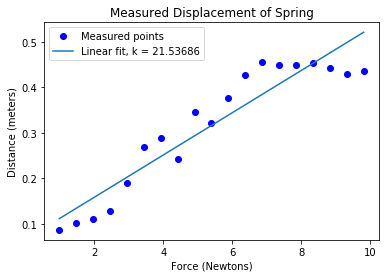

In [3]:
fitData('springData.txt')
pylab.show()